<a href="https://colab.research.google.com/github/karlaguimaraesp/Interview-Test-/blob/main/manipulaeHealth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 - Importando bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


2 - Carregando base de dados:

In [ ]:
url =  ("https://raw.githubusercontent.com/manipulaeHealth/desafio-machine-learning/main/dados_preco.csv")
df = pd.read_csv(url)
df


,descricao,criado,qtdInsumos,calculado,correto
0,30 CAP | BUPROPIONA CLORIDRATO 150MG,2020-08-05 23:19:09,1,47.5297,39.9
1,60 CAP | FINASTERIDA 1:10 1MG,2020-08-05 22:51:09,1,46.9620,43.6
2,60 CAP | NAC 250MG; SILIMARINA 150MG; SAME ...,2020-08-05 22:51:09,3,105.1390,111.4
3,60 CAP | ANASTROZOL 1:10 0.300MG,2020-08-05 22:51:09,1,49.0314,43.6
4,120 CAP | DUTASTERIDA 0.250MG; TADALAFIL 10MG,2020-08-05 22:49:09,2,161.8272,146.0
...,...,...,...,...,...
7116,45 CAP | SERTRALINA CLORIDRATO 40MG; SLENDEST...,2020-07-09 17:33:11,12,188.5325,181.8
7117,120 CAP | GREENSELECT 120MG,2020-07-09 17:24:09,1,377.6529,346.6
7118,60 CAP | MAGNESIO QUELADO 30% 220MG; SELENIO ...,2020-07-09 17:23:10,11,166.2868,157.2
7119,30 CAP | VALERIANA 50MG; PASSIFLORA 500MG; C...,2020-07-09 17:22:09,3,60.1646,68.1


3 - Analisando dados estatísticos

In [ ]:
df.describe()

,qtdInsumos,calculado,correto
count,7121.000000,7121.000000,7121.000000
mean,3.281842,137.089552,135.891798
std,3.194301,191.266516,189.806974
min,1.000000,30.000100,33.000000
25%,1.000000,49.786100,49.500000
50%,2.000000,87.350300,83.100000
75%,4.000000,165.167000,161.200000
max,26.000000,10364.992500,10356.000000


4 - Tipo das variáveis

In [ ]:
df.dtypes

descricao      object
criado         object
qtdInsumos      int64
calculado     float64
correto       float64
dtype: object

5 - Verificando se há dados faltantes

In [ ]:
df.isnull().sum()

descricao     0
criado        0
qtdInsumos    0
calculado     0
correto       0
dtype: int64

6 - Tamnho da base de dados

In [ ]:
df.shape

(7121, 5)

7 - Analisando correlação entre variáveis:

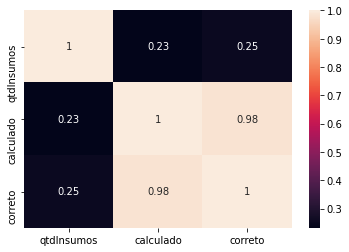

In [ ]:
sns.heatmap(df.corr(), annot=True)

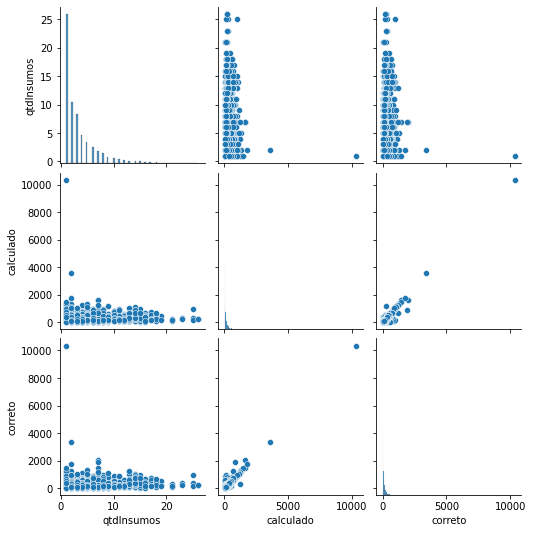

In [ ]:
sns.pairplot(df)

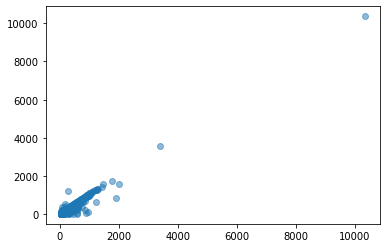

In [ ]:
plt.scatter(X, y, alpha=0.5)
plt.show()

In [ ]:
#O gráfico acima denota que uma "reta" (y = b0 + b1x) é ideal para ajuste do modelo
#Sendo assim, será empregado a técnica de Regressão Linear. A biblioteca Scikit learn será utilizada para aplicação dessa técnica.

8 - Regressão Linear

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
X = np.array(df['correto']).reshape((-1, 1))
y = np.array(df['calculado'])

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model = LinearRegression().fit(X, y)

In [ ]:
# R^2
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9647187734140441


In [ ]:
#b0
print('intercept:', model.intercept_)

intercept: 2.5901383860514215


In [ ]:
#b1
print('slope:', model.coef_)

slope: [0.98975373]


In [ ]:
y_pred = model.predict(X)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 42.08131217  45.74340097 112.8487038  ... 158.17942459  69.99236733
  96.91366876]


In [ ]:
#aplicando na função 
y_pred = model.intercept_ + model.coef_ * X
print('predicted response:', y_pred, sep='\n')

predicted response:
[[ 42.08131217]
 [ 45.74340097]
 [112.8487038 ]
 ...
 [158.17942459]
 [ 69.99236733]
 [ 96.91366876]]


In [ ]:
y_pred[0:5121]

array([[ 42.08131217],
       [ 45.74340097],
       [112.8487038 ],
       ...,
       [ 45.74340097],
       [ 45.74340097],
       [107.89993515]])

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(y_pred)

[[ 42.08131217]
 [ 45.74340097]
 [112.8487038 ]
 ...
 [158.17942459]
 [ 69.99236733]
 [ 96.91366876]]


9 - Avaliando modelo

In [ ]:
#LinearRegression / train_test_split

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=0)

In [ ]:
model = LinearRegression().fit(X_train, y_train)
model.intercept_

2.3566821519187613

In [ ]:
model.coef_

array([0.98892343])

In [ ]:
model.score(X_train, y_train)

0.9669423433464378

In [ ]:
model.score(X_test, y_test)

0.9519682632012596

In [ ]:
#Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=0).fit(X_train, y_train)
model.score(X_train, y_train)

0.9849211912229826

In [ ]:
model.score(X_test, y_test)

0.9263219635786286

In [ ]:
#RandomForest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=0).fit(X_train, y_train)
model.score(X_train, y_train)

0.9645479948323997

In [ ]:
model.score(X_test, y_test)

0.916373856315039

Referência:

1 - https://realpython.com/linear-regression-in-python/
2 - https://realpython.com/train-test-split-python-data/